In [1]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
n = 100
A = sparse.diags([-1, 2, -1], [-1, 0, 1], shape=(n,n), format='csr')
b = np.zeros((n,))

x0 = np.random.rand(n)
r0 = b - A * x0
print('Starting residual = ', np.linalg.norm(b - A *x0))

Starting residual =  7.66218559802


In [11]:
m = 12
V = np.zeros((n,m))
V[:, 0] = r0
for i in range(1, m):
    V[:, i] = A * V[:, i-1]
    
y = np.linalg.inv(V.T.dot(A * V)).dot(V.T.dot(r0)) # y = (V.T A V)^{-1} V.T r
delta = V.dot(y)
xm = x0 + delta
print('Ending residual = ', np.linalg.norm(b - A *xm))

Ending residual =  7.00567626467


In [13]:
res = []
for mm in range(2,50):
    m = mm
    V = np.zeros((n,m))
    V[:, 0] = r0
    for i in range(1, m):
        V[:, i] = A * V[:, i-1]
    
    y = np.linalg.inv(V.T.dot(A * V)).dot(V.T.dot(r0)) # y = (V.T A V)^{-1} V.T r
    delta = V.dot(y)
    xm = x0 + delta
    print('Ending residual = ', np.linalg.norm(b - A *xm))
    res.append(np.linalg.norm(b - A *xm))

Ending residual =  0.667694947851
Ending residual =  0.421435362033
Ending residual =  0.253314272922
Ending residual =  0.185089927406
Ending residual =  0.167299996177
Ending residual =  0.146806953322
Ending residual =  0.107874709673
Ending residual =  0.0863991468206
Ending residual =  0.0699396568101
Ending residual =  1.20265934864
Ending residual =  7.00567626467
Ending residual =  1.81609699817
Ending residual =  7.11819205066
Ending residual =  4.76234125976
Ending residual =  23.3902342146
Ending residual =  98.3176744309
Ending residual =  27.4144142276
Ending residual =  9.54380988434
Ending residual =  35.1631435787
Ending residual =  52.9766716011
Ending residual =  41575.7512453
Ending residual =  700.540492449
Ending residual =  60.9907521944
Ending residual =  23.9742694588
Ending residual =  745.202249349
Ending residual =  153.954548656
Ending residual =  304.807463085
Ending residual =  595.300344781
Ending residual =  175.813590522
Ending residual =  220.987194351

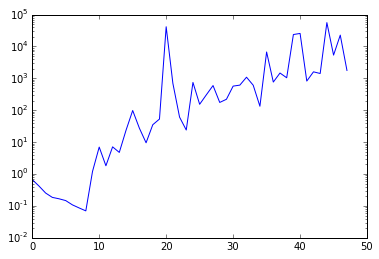

In [14]:
plt.semilogy(res)